Подключаем нужные нам библиотеки numpy, matplotlib и scipy.stats.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Генерируем выборку из стандартного нормального распределения.

In [2]:
n = 10 ** 4
sample = sps.norm.rvs(size = n)
sample

array([-0.52875275,  0.73693329, -1.70878283, ..., -1.06865459,
       -0.16289924, -0.59607358])

Теперь нам нужно задать эмпирическую функцию распределения: $F(y) = \frac{\sum_{i = 1}^n{I(x_i \le y)}}{n}$

In [3]:
def empiric_cdf(y, number_of_elements) :
    return sum([x < y for x in sample[:(number_of_elements)]]) / (float(number_of_elements))

Задаём массив размеров, для которых мы будем строить ЭФР.

In [4]:
sizes = [10, 25, 50, 100, 1000, 10000]

Теперь строим графики ЭФР, поверх которой наложим функцию распределения стандартного нормального распределения. А также отметим на оси абсцисс точки скачков кривых с коэффициентом прозрачности равным 0.2.

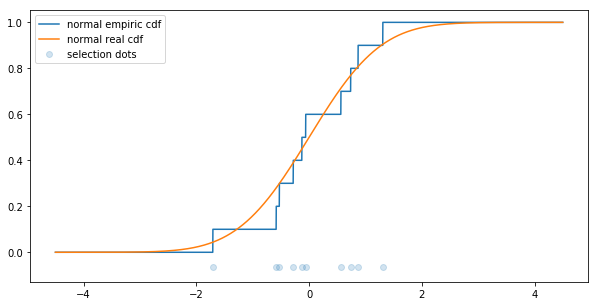

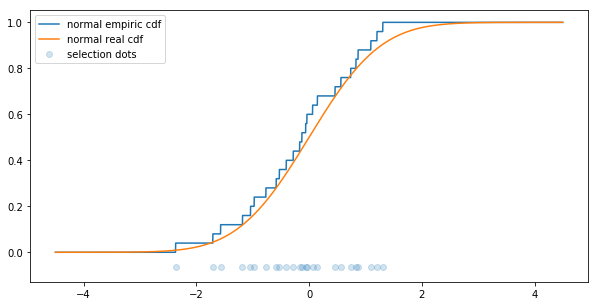

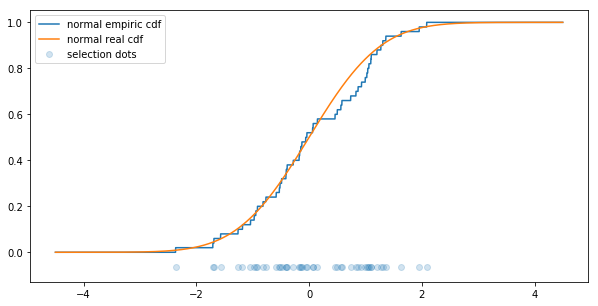

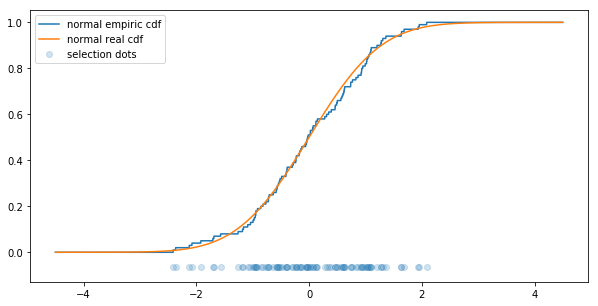

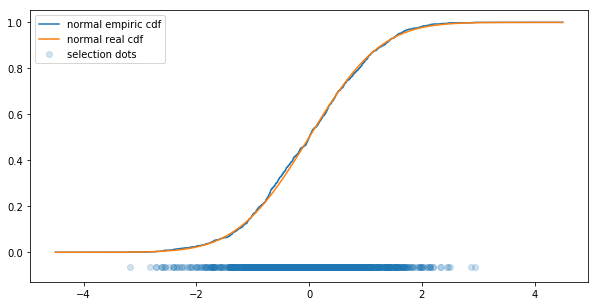

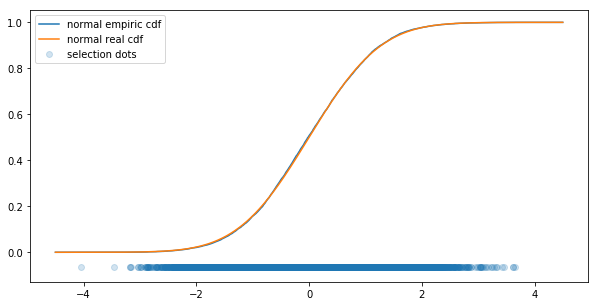

In [5]:
points = np.linspace(-4.5, 4.5, n)
for i in range(len(sizes)) :
    plt.figure(figsize=(10,5))
    plt.plot(points, [empiric_cdf(y, sizes[i]) for y in points], label = 'normal empiric cdf')
    plt.plot(points, [sps.norm.cdf(y) for y in points], label = 'normal real cdf')
    plt.scatter(sample[:(sizes[i])], sizes[i] * [0 - 1/16.], label = 'selection dots', alpha = 0.2)
    plt.legend()
    plt.show()


Теперь нам необходимо посчитать оценку $D_n$ в зависимости от n. Для этого сначала посчитаем значения функции распределения стандартного нормального распределения.

In [6]:
sample.sort()

In [7]:
cdf_values = {x : sps.norm.cdf(x) for x in sample}

Далее соотвественно считаем оценку $D_n$:

In [8]:
D_n = [np.max([np.abs(np.where(sample[:(i + 1)] == y)[0] / (float(i + 1)) - 
                       cdf_values[y]) for y in sample[:(i + 1)]]) for i in range(10000)]

Теперь строим график зависимости $D_n$ от n:

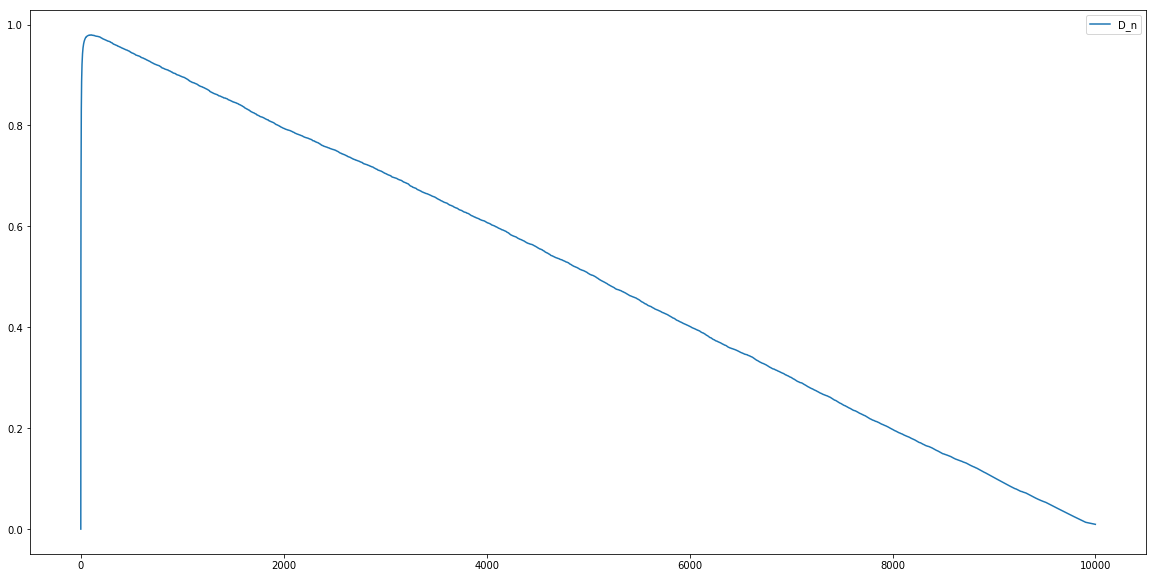

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(range(n), D_n, label='D_n')
plt.legend()
plt.show()

Видим, что мы получили верный результат, соответствующий утверждению теоремы Гливенко-Кантелли. Теперь зададим оценку $\sqrt{n}D_{n}$ и построим её график.

In [10]:
sqrt_D_n = [(i + 1) ** 0.5 * np.max([np.abs(np.where(sample[:(i + 1)] == y)[0] / (float(i + 1)) - 
                       cdf_values[y]) for y in sample[:(i + 1)]]) for i in range(10000)]

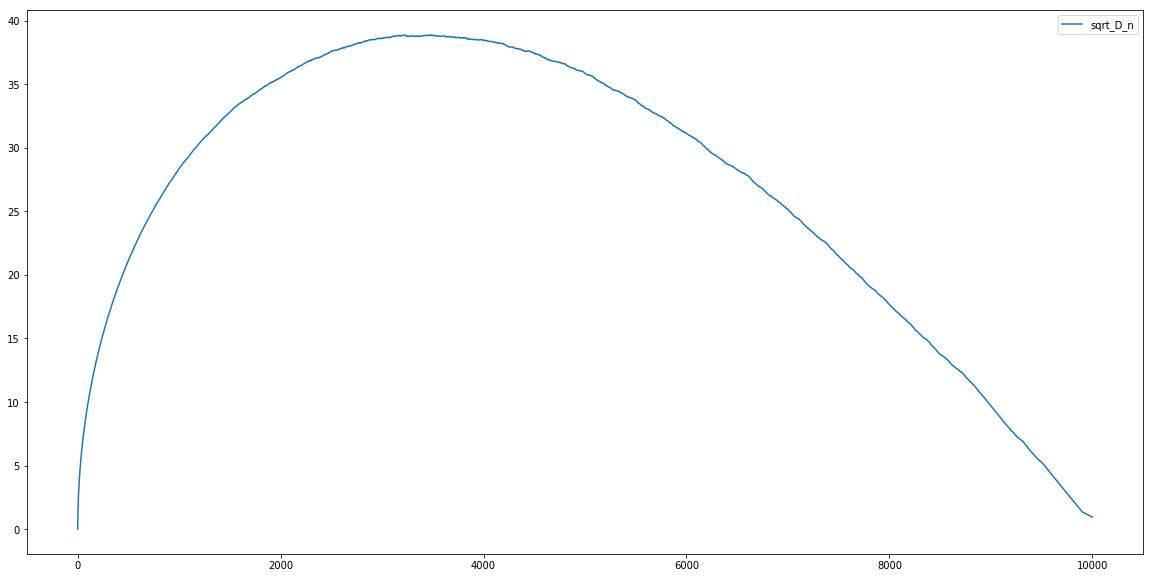

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(range(n), sqrt_D_n, label='sqrt_D_n')
plt.legend()
plt.show()

Видим, что мы получили верный результат, удовлетворяющий теореме Колмогорова.